# Load and Visualize a myoSuite model
In this notebook is shown how to load a model and visualize it

In [1]:
from myosuite.utils import gym
import skvideo.io
import numpy as np
import os

MyoSuite:> Registering Myo Envs


In [2]:
from IPython.display import HTML
from base64 import b64encode
 
def show_video(video_path, video_width = 400):
   
  video_file = open(video_path, "r+b").read()
 
  video_url = f"data:video/mp4;base64,{b64encode(video_file).decode()}"
  return HTML(f"""<video autoplay width={video_width} controls><source src="{video_url}"></video>""")
 

In [ ]:
env = gym.make('myoElbowPose1D6MRandom-v0')
print('List of cameras available', [env.sim.model.camera(i).name for i in range(env.sim.model.ncam)])
env.reset()
frames = []
for _ in range(100):
    frame = env.sim.renderer.render_offscreen(
                        width=400,
                        height=400,
                        camera_id=0)
    frames.append(frame)
    env.step(env.action_space.sample()) # take a random action
env.close()

os.makedirs('videos', exist_ok=True)
# make a local copy
skvideo.io.vwrite('videos/temp.mp4', np.asarray(frames),outputdict={"-pix_fmt": "yuv420p"})

# show in the notebook
show_video('videos/temp.mp4')

  Using cached matplotlib-3.7.1-cp38-cp38-macosx_11_0_arm64.whl (7.3 MB)
  Using cached contourpy-1.1.0-cp38-cp38-macosx_11_0_arm64.whl (229 kB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached fonttools-4.40.0-cp38-cp38-macosx_10_9_universal2.whl (2.6 MB)
  Using cached kiwisolver-1.4.4-cp38-cp38-macosx_11_0_arm64.whl (63 kB)


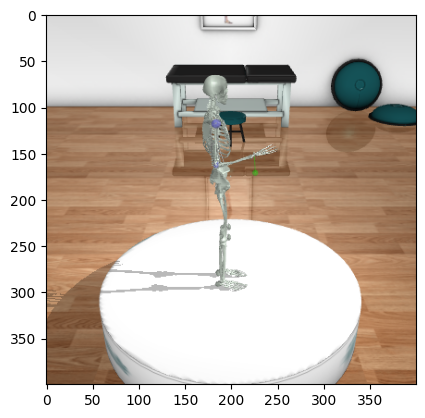

In [7]:
!pip install matplotlib
import matplotlib.pyplot as plt
plt.imshow(frame)